# Library

In [1]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 12.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 829.6 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 55.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the necessary packages and modules
import numpy as np
import os
# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import MobileNet

# Others
import shutil
import random

# Load dataset

In [4]:
# Image Height, Width and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator flow from directory
train_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    directory=r"Dataset/Test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Check the classes
train_generator.class_indices
validation_generator.class_indices

# Check the shape of the images
train_generator.image_shape
validation_generator.image_shape

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


(224, 224, 3)

In [5]:
# Check GPU
!nvidia-smi

Thu Feb  1 08:02:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090        On  | 00000000:81:00.0 Off |                  N/A |
|  0%   29C    P8              17W / 350W |     12MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Basic Model

In [6]:
# Define the basic model
MobileNet_Basic = MobileNet(weights=None, 
                  include_top=True, 
                  input_shape=(img_height, img_width, 3),
                  classes=2,
                  classifier_activation='softmax',
                  dropout=0.01)

In [7]:
# Compile the model
MobileNet_Basic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Check the model summary
MobileNet_Basic.summary() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [9]:
# Define the number of epochs
epochs = 100

# Train the model
history_basic = MobileNet_Basic.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100


I0000 00:00:1706774576.960710    1129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 82s 65ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0495 - val_accuracy: 0.9895
Epoch 2/100
1000/1000 [==============================] - 66s 66ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.0098 - val_accuracy: 0.9956
Epoch 3/100
1000/1000 [==============================] - 66s 66ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 4/100
1000/1000 [==============================] - 66s 66ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.3384 - val_accuracy: 0.9669
Epoch 5/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0282 - val_accuracy: 0.9896
Epoch 6/100
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0200 - val_accuracy: 0.9954
Epoch 7/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0058 - val_

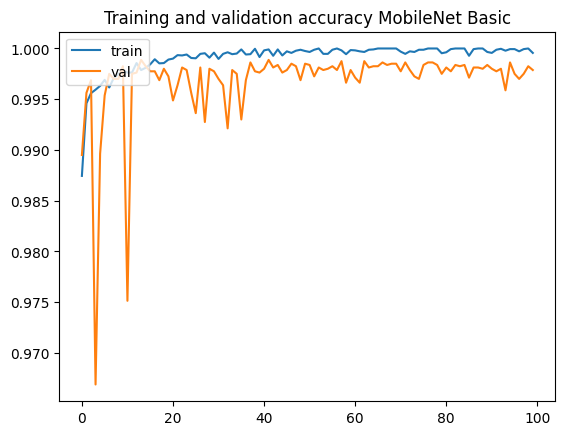

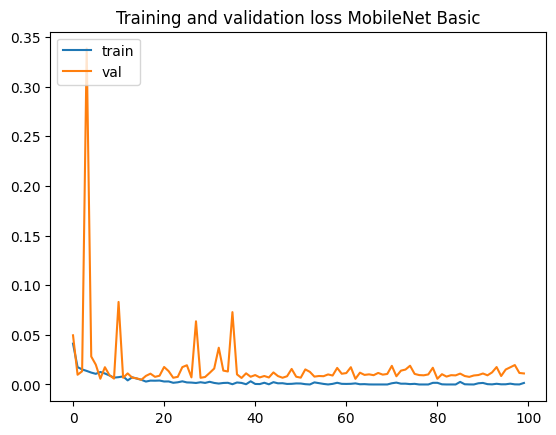

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_basic.history['accuracy']
val_acc  = history_basic.history['val_accuracy']
loss     = history_basic.history['loss']
val_loss = history_basic.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Basic')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Basic')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.95)

In [11]:
# Modified model alpha = 0.95
MobileNet_Modified1 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.95)

In [12]:
# Compile the model
MobileNet_Modified1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Check the model summary
MobileNet_Modified1.summary()

Model: "mobilenet_0.95_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 30)      810       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 30)      120       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 30)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 30)      270       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 30

In [14]:
# Train the model
history_modified1 = MobileNet_Modified1.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 88s 71ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0117 - val_accuracy: 0.9969
Epoch 2/100
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0895 - val_accuracy: 0.9851
Epoch 3/100
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0133 - val_accuracy: 0.9960
Epoch 4/100
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0262 - val_accuracy: 0.9909
Epoch 5/100
1000/1000 [==============================] - 81s 81ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.2197 - val_accuracy: 0.9787
Epoch 6/100
1000/1000 [==============================] - 77s 77ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0902 - val_accuracy: 0.9858
Epoch 7/100
1000/1000 [==============================] - 74s 74ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0

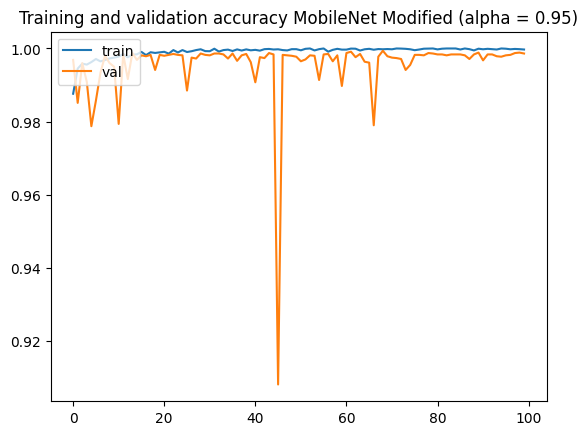

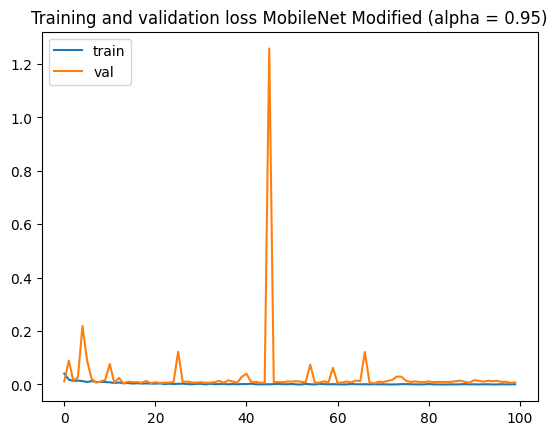

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified1.history['accuracy']
val_acc  = history_modified1.history['val_accuracy']
loss     = history_modified1.history['loss']
val_loss = history_modified1.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha = 0.95)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha = 0.95)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.90)

In [16]:
# Modified model alpha = 0.90
MobileNet_Modified2 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.90)

In [17]:
# Compile the model
MobileNet_Modified2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Check the model summary
MobileNet_Modified2.summary()

Model: "mobilenet_0.90_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 28)      756       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 28)      112       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 28)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 28)      252       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 28

In [19]:
# Train the model
history_modified2 = MobileNet_Modified2.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 90s 71ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.2399 - val_accuracy: 0.9438
Epoch 2/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0101 - val_accuracy: 0.9971
Epoch 3/100
1000/1000 [==============================] - 71s 70ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 0.0226 - val_accuracy: 0.9956
Epoch 4/100
1000/1000 [==============================] - 72s 72ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0065 - val_accuracy: 0.9981
Epoch 5/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0338 - val_accuracy: 0.9915
Epoch 6/100
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0696 - val_accuracy: 0.9859
Epoch 7/100
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0

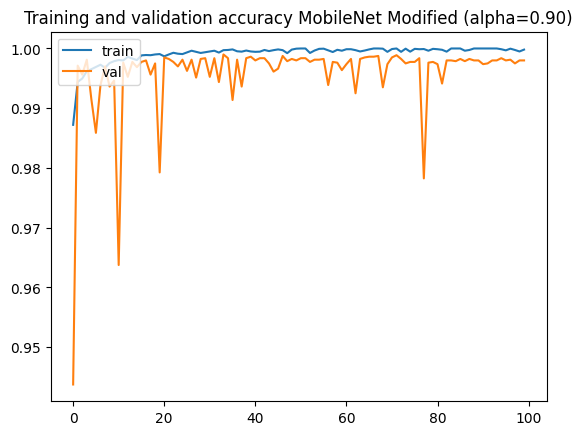

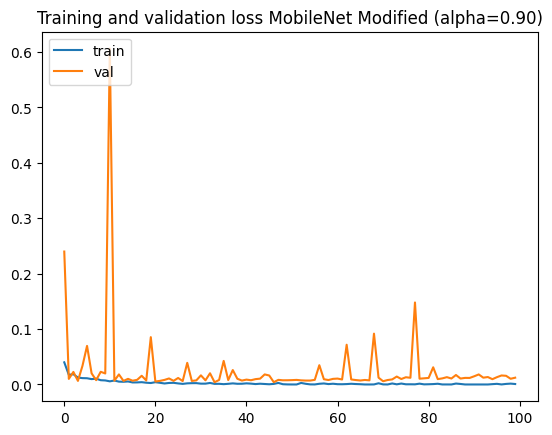

In [20]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified2.history['accuracy']
val_acc  = history_modified2.history['val_accuracy']
loss     = history_modified2.history['loss']
val_loss = history_modified2.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.90)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.90)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.85)

In [21]:
# Modified model alpha = 0.85
MobileNet_Modified3 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.85)

In [22]:
# Compile the model
MobileNet_Modified3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Check the model summary
MobileNet_Modified3.summary()

Model: "mobilenet_0.85_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 27)      729       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 27)      108       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 27)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 27)      243       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 27

In [24]:
# Train the model
history_modified3 = MobileNet_Modified3.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 86s 69ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0303 - val_accuracy: 0.9916
Epoch 2/100
1000/1000 [==============================] - 74s 74ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0081 - val_accuracy: 0.9975
Epoch 3/100
1000/1000 [==============================] - 67s 67ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0255 - val_accuracy: 0.9958
Epoch 4/100
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0075 - val_accuracy: 0.9976
Epoch 5/100
1000/1000 [==============================] - 72s 72ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0075 - val_accuracy: 0.9981
Epoch 6/100
1000/1000 [==============================] - 71s 71ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 7/100
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0

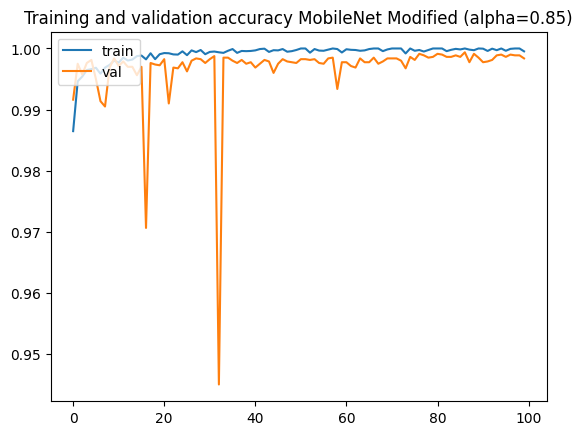

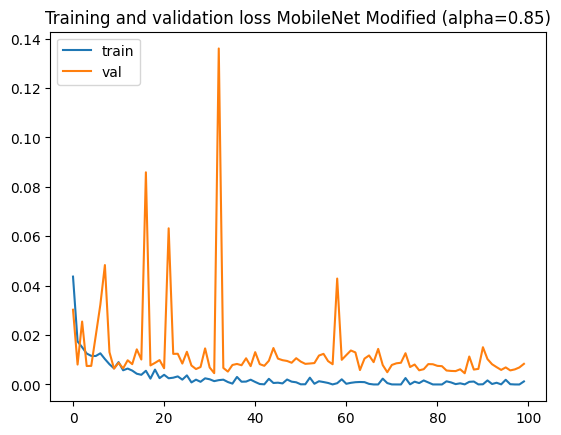

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified3.history['accuracy']
val_acc  = history_modified3.history['val_accuracy']
loss     = history_modified3.history['loss']
val_loss = history_modified3.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.85)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.85)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.80)

In [26]:
# Modified model alpha = 0.80
MobileNet_Modified4 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.8)

In [27]:
# Compile the model
MobileNet_Modified4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Check the model summary
MobileNet_Modified4.summary()

Model: "mobilenet_0.80_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 25)      675       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 25)      100       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 25)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 25)      225       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 25

In [29]:
# Train the model
history_modified4 = MobileNet_Modified4.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 87s 69ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0486 - val_accuracy: 0.9875
Epoch 2/100
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0392 - val_accuracy: 0.9896
Epoch 3/100
1000/1000 [==============================] - 73s 73ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0113 - val_accuracy: 0.9961
Epoch 4/100
1000/1000 [==============================] - 69s 69ms/step - loss: 0.0159 - accuracy: 0.9955 - val_loss: 0.0096 - val_accuracy: 0.9975
Epoch 5/100
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 6/100
1000/1000 [==============================] - 68s 68ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0170 - val_accuracy: 0.9975
Epoch 7/100
1000/1000 [==============================] - 70s 70ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0

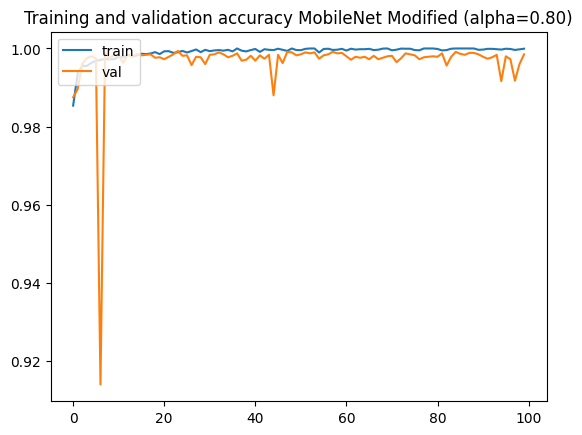

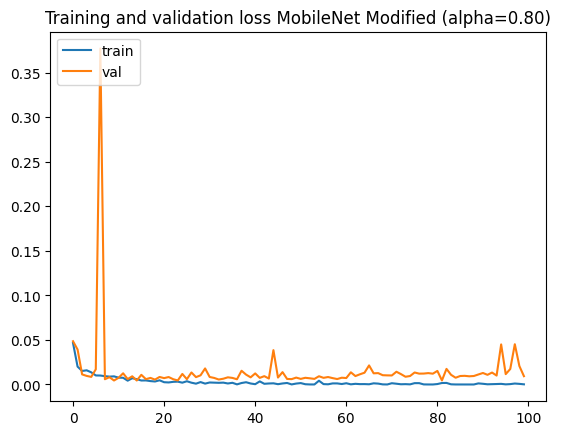

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified4.history['accuracy']
val_acc  = history_modified4.history['val_accuracy']
loss     = history_modified4.history['loss']
val_loss = history_modified4.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.80)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.80)')
plt.legend(['train', 'val'], loc='upper left')

# Modified MobileNet (alpha=0.75)

In [31]:
# Modified model alpha = 0.80
MobileNet_Modified5 = MobileNet(weights=None, 
                                include_top=True, 
                                input_shape=(img_height, img_width, 3),
                                classes=2,
                                classifier_activation='softmax',
                                dropout=0.01,
                                alpha=0.75)

In [32]:
# Compile the model
MobileNet_Modified5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Check the model summary
MobileNet_Modified5.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 24)      96        
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 24)      216       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 24

In [34]:
# Train the model
history_modified5 = MobileNet_Modified5.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 100,
    batch_size = batch_size,
    verbose = 1)

Epoch 1/100
1000/1000 [==============================] - 86s 68ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0262 - val_accuracy: 0.9934
Epoch 2/100
1000/1000 [==============================] - 66s 66ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.0167 - val_accuracy: 0.9941
Epoch 3/100
1000/1000 [==============================] - 64s 64ms/step - loss: 0.0147 - accuracy: 0.9962 - val_loss: 0.0066 - val_accuracy: 0.9981
Epoch 4/100
1000/1000 [==============================] - 67s 67ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.0175 - val_accuracy: 0.9962
Epoch 5/100
1000/1000 [==============================] - 65s 65ms/step - loss: 0.0151 - accuracy: 0.9954 - val_loss: 0.0082 - val_accuracy: 0.9980
Epoch 6/100
1000/1000 [==============================] - 67s 67ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0112 - val_accuracy: 0.9970
Epoch 7/100
1000/1000 [==============================] - 65s 65ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0

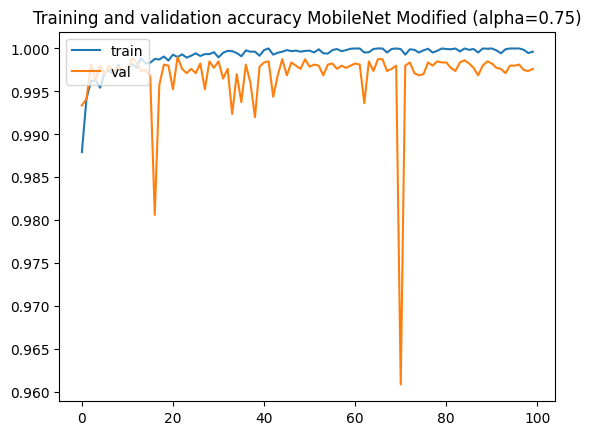

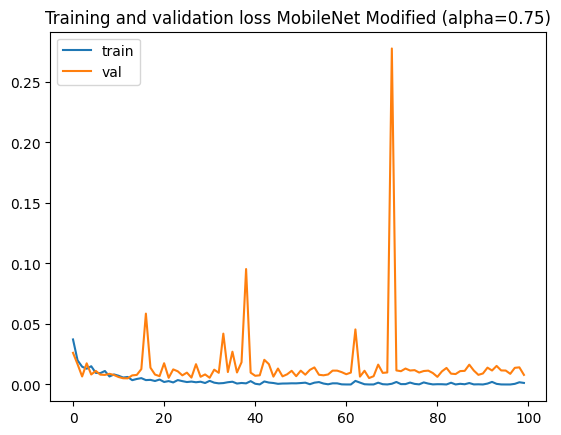

In [35]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_modified5.history['accuracy']
val_acc  = history_modified5.history['val_accuracy']
loss     = history_modified5.history['loss']
val_loss = history_modified5.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy MobileNet Modified (alpha=0.75)')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss MobileNet Modified (alpha=0.75)')
plt.legend(['train', 'val'], loc='upper left')

# Save All Model

In [36]:
# Save all the model
MobileNet_Basic.save('MobileNet_Basic.h5')
MobileNet_Modified1.save('MobileNet_Modified1.h5')
MobileNet_Modified2.save('MobileNet_Modified2.h5')
MobileNet_Modified3.save('MobileNet_Modified3.h5')
MobileNet_Modified4.save('MobileNet_Modified4.h5')
MobileNet_Modified5.save('MobileNet_Modified5.h5')